In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate as integ
import matplotlib.animation as animation
import matplotlib
#import ternary
import random
import math
import warnings
warnings.filterwarnings('ignore')

In [9]:
def social_groups(X,t,g1,g2):
    
    X1 = X[0:3]
    X2 = X[3:]

    A = np.array([[1, -1, 1], [-1, -1, -1], [1, -1, 0]])
    B = np.array([[-1, -1, -1], [-1, 1, 1], [-1, 1, 0]])
    
    x1 = X1[0]
    y1 = X1[1]
    z1 = X1[2] 

    x2 = X2[0]
    y2 = X2[1]
    z2 = X2[2] 
    
    x1fitness = g1 * np.matmul(A, X1)[0] + g2 * np.matmul(B, X2)[0]
    y1fitness = g1 * np.matmul(A, X1)[1] + g2 * np.matmul(B, X2)[1]
    z1fitness = g1 * np.matmul(A, X1)[2] + g2 * np.matmul(B, X2)[2]

    x2fitness = g2 * np.matmul(A, X2)[0] + g1 * np.matmul(B, X1)[0]
    y2fitness = g2 * np.matmul(A, X2)[1] + g1 * np.matmul(B, X1)[1]
    z2fitness = g2 * np.matmul(A, X2)[2] + g1 * np.matmul(B, X1)[2]

    avfitnessg1 = x1*x1fitness + y1*y1fitness + z1*z1fitness
    avfitnessg2 = x2*x2fitness + y2*y2fitness + z2*z2fitness

    # Change in strategy frequencies:
    x1dot = x1*(x1fitness-avfitnessg1)
    y1dot = y1*(y1fitness-avfitnessg1)
    z1dot = z1*(z1fitness-avfitnessg1)
    x2dot = x2*(x2fitness-avfitnessg2)
    y2dot = y2*(y2fitness-avfitnessg2)
    z2dot = z2*(z2fitness-avfitnessg2)

    Xdot = np.array([x1dot,y1dot,z1dot,x2dot,y2dot,z2dot])    
    return Xdot

In [13]:
def social_groups_norm(X,t,g1,g2):
    
    X1 = X[0:3]
    X2 = X[3:]

    A = np.array([[1, -1, 1], [-1, -1, -1], [1, -1, 0]])
    B = np.array([[-1, -1, -1], [-1, 1, 1], [-1, 1, 0]])
    
    x1 = X1[0]
    y1 = X1[1]
    z1 = X1[2] 

    x2 = X2[0]
    y2 = X2[1]
    z2 = X2[2] 
    
    x1fitness = g1 * np.matmul(A, X1)[0] + g2 * np.matmul(B, X2)[0]
    y1fitness = g1 * np.matmul(A, X1)[1] + g2 * np.matmul(B, X2)[1]
    z1fitness = g1 * np.matmul(A, X1)[2] + g2 * np.matmul(B, X2)[2]

    x2fitness = g2 * np.matmul(A, X2)[0] + g1 * np.matmul(B, X1)[0]
    y2fitness = g2 * np.matmul(A, X2)[1] + g1 * np.matmul(B, X1)[1]
    z2fitness = g2 * np.matmul(A, X2)[2] + g1 * np.matmul(B, X1)[2]

    avfitnessg1 = x1*x1fitness + y1*y1fitness + z1*z1fitness
    avfitnessg2 = x2*x2fitness + y2*y2fitness + z2*z2fitness

    # Change in strategy frequencies:
    x1dot = x1*(x1fitness-avfitnessg1)
    y1dot = y1*(y1fitness-avfitnessg1)
    z1dot = z1*(z1fitness-avfitnessg1)
    x2dot = x2*(x2fitness-avfitnessg2)
    y2dot = y2*(y2fitness-avfitnessg2)
    z2dot = z2*(z2fitness-avfitnessg2)

    dfdt = np.array([x1dot,y1dot,z1dot,x2dot,y2dot,z2dot])   

    # Normalize frequencies to sum to 1
    f1_total_new = x1 + y1 + z1 + sum(dfdt[:3]) * 0.001
    f2_total_new = x2 + y2 + z2 + sum(dfdt[3:]) * 0.001

    dfdt = [df / f_total_new for df, f_total_new in zip(dfdt, [f1_total_new, f1_total_new, f1_total_new, f2_total_new, f2_total_new, f2_total_new])]

    return dfdt
 
    return Xdot

# Evolution of ethnic preferences

Payoff matrix:       $\left(\begin{matrix}
1 & -1 & 1 \\
-1 & -1 & -1 \\
1 & -1 & 0
\end{matrix}\right)$

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


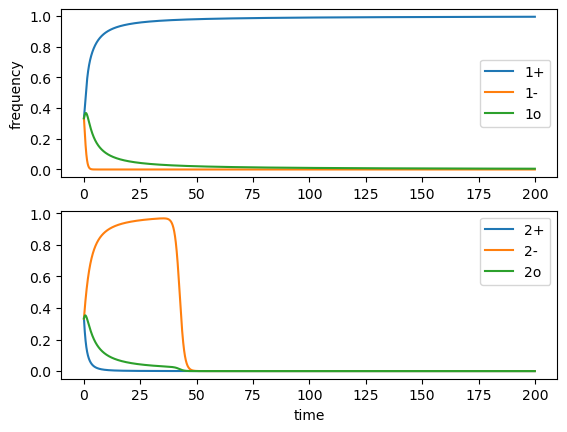

In [15]:
#x01 = np.random.rand(1,3)
#x02 = np.random.rand(1,3)
x01 = np.ones(3,)
x02 = np.ones(3,)
x0 = np.concatenate((x01 / np.sum(x01), x02/np.sum(x02)))
x0 = x0.reshape(6,)
#x0 = [0.2,0.5,0.3,0.2,0.5,0.3]
print(x0) 
g1 = 1
g2 = 0
tend = 200 
tstep = 0.01 
t = np.arange(0,tend,tstep)

x = integ.odeint(social_groups, x0, t, args=(g1,g2))

fig, axs = plt.subplots(2)
axs[0].plot(t, x[:,0], label=f'1+')
axs[0].plot(t, x[:,1], label=f'1-')
axs[0].plot(t, x[:,2], label=f'1o')
axs[1].plot(t, x[:,3], label=f'2+')
axs[1].plot(t, x[:,4], label=f'2-')
axs[1].plot(t, x[:,5], label=f'2o')

axs[1].set_xlabel('time')
axs[0].set_ylabel('frequency')
axs[0].legend()
axs[1].legend()


[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


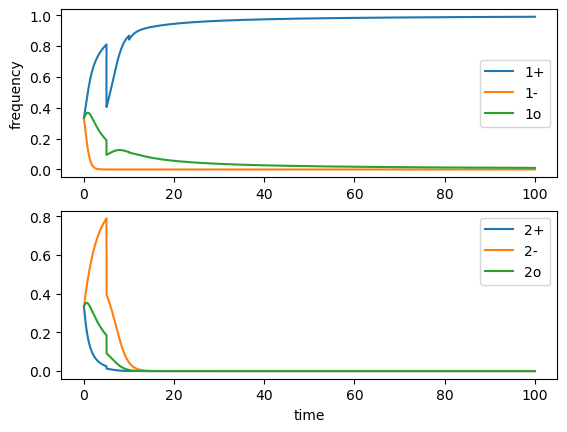

In [8]:
#x01 = np.random.rand(1,3)
#x02 = np.random.rand(1,3)
x01 = np.ones(3,)
x02 = np.ones(3,)
x0 = np.concatenate((x01 / np.sum(x01), x02/np.sum(x02)))
x0 = x0.reshape(6,)
#x0 = [0.2,0.5,0.3,0.2,0.5,0.3]
print(x0) 
g1 = 1
g2 = 0
treps = 20
tchunk = 5
tstart = 0
tstep = 0.001

for i in range(treps):
    t = np.arange(tstart,tchunk*(i+1),tstep)
    x = integ.odeint(social_groups, x0, t, args=(g1,g2))
    if i == 0:
        xall = x
    else:
        xall = np.concatenate((xall,x))
    tstart = tchunk*(i+1)
    x0 = x[-1,:] / np.sum(x[-1,:])

t = np.arange(0,treps*tchunk,tstep)
fig, axs = plt.subplots(2)
axs[0].plot(t, xall[:,0], label=f'1+')
axs[0].plot(t, xall[:,1], label=f'1-')
axs[0].plot(t, xall[:,2], label=f'1o')
axs[1].plot(t, xall[:,3], label=f'2+')
axs[1].plot(t, xall[:,4], label=f'2-')
axs[1].plot(t, xall[:,5], label=f'2o')


axs[1].set_xlabel('time')
axs[0].set_ylabel('frequency')
axs[0].legend()
axs[1].legend()
